# SBP Operators

In this example, we demonstrate how SBP operators can be accessed. We start by importing the necessary packages. 

In [1]:
using SummationByParts, LinearAlgebra
using SummationByParts.Cubature, SummationByParts.SymCubatures
using Latexify

## 1D Operators

### LGL Operators

In [2]:
T = Float64

Float64

In [3]:
p = 3; # degree of the SBP operator

In [4]:
oper_lgl = getLineSegSBPLobbato(degree=p)

LineSegSBP{Float64}(3, 4, LineSymCub{Float64}(1, 2, 4, true, false, 1, [0, 2], [0.7236067977499789], [0.16666666666666666, 0.8333333333333334]), [-1.0; 1.0;;], [0.16666666666666666, 0.16666666666666666, 0.8333333333333334, 0.8333333333333334], [-0.5000000000000004 0.08333333333333322 0.6741808286457897 -0.2575141619791227; -0.08333333333333322 0.5000000000000004 0.2575141619791226 -0.6741808286457893; -0.6741808286457897 -0.2575141619791226 0.0 0.9316949906249125; 0.2575141619791227 0.6741808286457893 -0.9316949906249125 0.0;;;], [-1.0000000000000009 0.0 0.0 0.0; 0.0 1.0000000000000009 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0;;;])

The SBP operators $\sf Q$, $\sf H$, $\sf D$, $\sf E$, and $\sf S$ can be obtained as:

In [5]:
Q = oper_lgl.Q;
Qx = Q[:,:,1];
latexify(Qx)

L"\begin{equation}
\left[
\begin{array}{cccc}
-0.5000000000000004 & 0.08333333333333322 & 0.6741808286457897 & -0.2575141619791227 \\
-0.08333333333333322 & 0.5000000000000004 & 0.2575141619791226 & -0.6741808286457893 \\
-0.6741808286457897 & -0.2575141619791226 & 0.0 & 0.9316949906249125 \\
0.2575141619791227 & 0.6741808286457893 & -0.9316949906249125 & 0.0 \\
\end{array}
\right]
\end{equation}
"

In [6]:
H = diagm(oper_lgl.w);
latexify(H)

L"\begin{equation}
\left[
\begin{array}{cccc}
0.16666666666666666 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.16666666666666666 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.8333333333333334 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.8333333333333334 \\
\end{array}
\right]
\end{equation}
"

To find the boundary operator, we proceed as:

In [51]:
E = oper_lgl.E;
Ex = E[:,:,1];
latexify(Ex)

L"\begin{equation}
\left[
\begin{array}{cccc}
-1.0000000000000009 & 0.0 & 0.0 & 0.0 \\
0.0 & 1.0000000000000009 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 \\
\end{array}
\right]
\end{equation}
"

$\sf S$ and $\sf D$ are computed using the formulas $${\sf D} = {\sf H}^{-1}{\sf Q}$$ $${\sf S} = {\sf Q} - \frac{1}{2}{\sf E}$$

In [8]:
Dx = inv(H)*Q[:,:,1];
latexify(Dx)

L"\begin{equation}
\left[
\begin{array}{cccc}
-3.0000000000000027 & 0.49999999999999933 & 4.045084971874738 & -1.5450849718747361 \\
-0.49999999999999933 & 3.0000000000000027 & 1.5450849718747355 & -4.045084971874736 \\
-0.8090169943749476 & -0.30901699437494706 & 0.0 & 1.118033988749895 \\
0.30901699437494723 & 0.8090169943749471 & -1.118033988749895 & 0.0 \\
\end{array}
\right]
\end{equation}
"

In [9]:
Sx = Qx - 0.5.*Ex;
latexify(Sx)

L"\begin{equation}
\left[
\begin{array}{cccc}
0.0 & 0.08333333333333322 & 0.6741808286457897 & -0.2575141619791227 \\
-0.08333333333333322 & 0.0 & 0.2575141619791226 & -0.6741808286457893 \\
-0.6741808286457897 & -0.2575141619791226 & 0.0 & 0.9316949906249125 \\
0.2575141619791227 & 0.6741808286457893 & -0.9316949906249125 & 0.0 \\
\end{array}
\right]
\end{equation}
"

Check if the SBP property is satisfied, i.e., $\sf Q+Q^{T}=E$

In [10]:
norm(Qx+Qx'-Ex)

0.0

### LG Operators

The same can be done for the LG operators.

In [11]:
oper_lg = getLineSegSBPLegendre(degree=p);

In [12]:
Qx = oper_lg.Q[:,:,1];
H = diagm(oper_lg.w);
Ex = oper_lg.E[:,:,1];
Dx = inv(H)*Q[:,:,1];
Sx = Qx - 0.5.*Ex;

In [13]:
latexify(Qx)

L"\begin{equation}
\left[
\begin{array}{cccc}
1.1590524262142834 & -0.20197432186638248 & -1.6906282616122885 & 0.7335501572643879 \\
0.20197432186638248 & -1.1590524262142834 & -0.7335501572643881 & 1.6906282616122876 \\
0.49403752802054723 & 0.21435895436195557 & 0.2506939833477965 & -0.9590904657302999 \\
-0.21435895436195523 & -0.4940375280205461 & 0.9590904657302999 & -0.2506939833477965 \\
\end{array}
\right]
\end{equation}
"

In [14]:
latexify(H)

L"\begin{equation}
\left[
\begin{array}{cccc}
0.3478548451374538 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.3478548451374538 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.652145154862546 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.652145154862546 \\
\end{array}
\right]
\end{equation}
"

In [15]:
latexify(Ex)

L"\begin{equation}
\left[
\begin{array}{cccc}
2.318104852428567 & 0.0 & -1.1965907335917414 & 0.5191912029024326 \\
0.0 & -2.318104852428567 & -0.5191912029024326 & 1.1965907335917414 \\
-1.1965907335917414 & -0.5191912029024326 & 0.501387966695593 & 0.0 \\
0.5191912029024326 & 1.1965907335917414 & 0.0 & -0.501387966695593 \\
\end{array}
\right]
\end{equation}
"

In [16]:
latexify(Dx)

L"\begin{equation}
\left[
\begin{array}{cccc}
-1.4373811576562256 & 0.23956352627603705 & 1.9381096398970354 & -0.7402920085168477 \\
-0.23956352627603705 & 1.4373811576562256 & 0.7402920085168474 & -1.9381096398970346 \\
-1.0337895231129766 & -0.39487246061561154 & 0.0 & 1.4286619837285883 \\
0.3948724606156117 & 1.0337895231129761 & -1.4286619837285883 & 0.0 \\
\end{array}
\right]
\end{equation}
"

In [17]:
latexify(Sx)

L"\begin{equation}
\left[
\begin{array}{cccc}
0.0 & -0.20197432186638248 & -1.0923328948164177 & 0.4739545558131716 \\
0.20197432186638248 & 0.0 & -0.4739545558131718 & 1.0923328948164168 \\
1.092332894816418 & 0.47395455581317186 & 0.0 & -0.9590904657302999 \\
-0.47395455581317153 & -1.0923328948164168 & 0.9590904657302999 & 0.0 \\
\end{array}
\right]
\end{equation}
"

Check if the SBP property is satisfied.

In [18]:
norm(Qx+Qx'-Ex)

4.440892098500626e-16

## 2D Operators

2D operators of the following range of degrees are currently available. 

SBP diagonal-$\sf E$: $p=\{1,\dots,10\}$ 

SBP-$\sf \Omega$ and SBP-$\sf \Gamma$: $p=\{1,\dots,4\}$

In [21]:
p = 3

3

For SBP diagonal-E operators, we must also specify whether the LGL or LG type facet quadrature should be used. We can also specify the quadrature accuracy to $q = 2p-1$ or $q = 2p$. 

In [22]:
q = 2*p - 1;
lgl = true;
lg = false;

In [23]:
oper_tri = SummationByParts.getTriSBPDiagE(degree=p,vertices=lgl,quad_degree=q)
# oper_tri = SummationByParts.getTriSBPOmega(degree=p)
# oper_tri = SummationByParts.getTriSBPGamma(degree=p)

TriSBP{Float64}(3, 15, TriSymCub{Float64}(2, 4, 15, true, true, false, 1, 1, 0, [0, 3, 1], [0.41469035132718185, 0.8273268353539885], [0.014698618394803228, 0.09752600361864236, 0.44155411568082115, 0.056443964486199594]), [-1.0 -1.0; 1.0 -1.0; -1.0 1.0], [0.014698618394803228, 0.014698618394803228, 0.014698618394803228, 0.09752600361864236, 0.09752600361864236, 0.09752600361864236, 0.44155411568082115, 0.44155411568082115, 0.44155411568082115, 0.056443964486199594, 0.056443964486199594, 0.056443964486199594, 0.056443964486199594, 0.056443964486199594, 0.056443964486199594], [-0.049999999999999975 -0.0023671950822507187 … 0.005536259493917467 -0.02112625259521883; 0.0023671950822507187 0.04999999999999985 … 0.0006021747554104691 -0.0011050478459257466; … ; -0.005536259493919476 -0.0006021747554104691 … -0.2722222222222222 0.019007663904928897; 0.02112625259521863 0.0011050478459257466 … -0.019007663904929556 -0.272222222222223;;; -0.04999999999999985 -0.0011835975411253925 … 0.01061568

We can now access the operators as:

In [24]:
Qx = oper_tri.Q[:,:,1];
Qy = oper_tri.Q[:,:,2];
H = diagm(oper_tri.w);
Ex = oper_tri.E[:,:,1];
Ey = oper_tri.E[:,:,2];
Dx = inv(H)*Qx;
Dy = inv(H)*Qy;
Sx = Qx - 0.5.*Ex;
Sy = Qy - 0.5.*Ey;

In [25]:
latexify(Qx)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n-0.049999999999999975 & -0.0023671950822507187 & -0.0011835975411248801 & -0.016745257556145192 & 0.011436861391542706 & 0.0025008918425173643 & -0.016959940580819673 & 0.037400633475618936 & -0.020440692894799405 & 0." ⋯ 4657 bytes ⋯ "49028003004 & 0.04332306298748983 & -0.05811143154735569 & 0.3007090028295045 & -0.0823778688407114 & 0.02287033558675849 & 0.004213523360313585 & 0.019404978787133525 & 0.016500430760107942 & -0.019007663904929556 & -0.272222222222223 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [26]:
latexify(Qy)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n-0.04999999999999985 & -0.0011835975411253925 & -0.0023671950822506424 & 0.0025008918425164514 & 0.0114368613915426 & -0.016745257556144953 & -0.020440692894799013 & 0.0374006334756192 & -0.01695994058082039 & -0.02112" ⋯ 4641 bytes ⋯ " -0.004611947483688368 & 0.09220143557442893 & 0.00026810998763168243 & 0.010654898984059104 & -0.0109230089716914 & -0.02287033558675877 & -0.012286907399794617 & 0.009702489393566714 & 0.00421352336031283 & -0.03801532780985704 & 0.0 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [27]:
latexify(H)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n0.014698618394803228 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\\\\n0.0 & 0.014698618394803228 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\\\\n0.0 " ⋯ 1153 bytes ⋯ "486199594 & 0.0 & 0.0 \\\\\n0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.056443964486199594 & 0.0 \\\\\n0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.056443964486199594 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [28]:
latexify(Ex)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n-0.09999999999999995 & 0.0 & 3.736106363113356e-16 & 0.0 & 0.0 & 2.481352671708552e-16 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -2.008790903612731e-15 & -1.9884290138145392e-16 \\\\\n0.0 & 0.0999999999999997 & -3.736106" ⋯ 1797 bytes ⋯ ".0 & 0.0 & -0.5444444444444444 & -6.625938477380781e-16 \\\\\n-1.9884290138145392e-16 & 0.0 & 4.576170768558353e-16 & 0.0 & 0.0 & 7.863653039133213e-16 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -6.625938477380781e-16 & -0.544444444444446 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [29]:
latexify(Ey)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n-0.0999999999999997 & 3.7361063631133567e-16 & 0.0 & -4.116962336015663e-16 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 7.459724561970394e-16 & 4.576170768558353e-16 & 0.0 & 0.0 & 0.0 & 0.0 \\\\\n3.736106363113356e-16 & -2.49800180540" ⋯ 1797 bytes ⋯ "& 6.625938477380781e-16 & 0.544444444444446 & 0.0 & 0.0 \\\\\n0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\\\\n0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [30]:
latexify(Dx)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n-3.4016802570830555 & -0.16104881551912748 & -0.08052440775953112 & -1.1392402405701996 & 0.7780909119721257 & 0.17014468811582775 & -1.1538459007015207 & 2.5444999299282522 & -1.390654029226741 & 4.138466134629476 & 0" ⋯ 4406 bytes ⋯ " & 0.27394867048687915 & 0.7675411070404561 & -1.0295419904738226 & 5.327567005025437 & -1.459462842317757 & 0.405186556170239 & 0.0746496706719419 & 0.34379191759072825 & 0.29233295198713855 & -0.33675281454719364 & -4.822875655532322 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [31]:
latexify(Dy)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n-3.4016802570830467 & -0.08052440775956599 & -0.16104881551912228 & 0.17014468811576566 & 0.7780909119721184 & -1.1392402405701834 & -1.3906540292267144 & 2.54449992992827 & -1.1538459007015696 & -1.4372951271860337 & " ⋯ 4410 bytes ⋯ "9331703 & -0.0817084257930886 & 1.633503890340161 & 0.004750020486198035 & 0.18876950053117192 & -0.19351952101738085 & -0.40518655617024396 & -0.21768328131520126 & 0.17189595879536326 & 0.07464967067192854 & -0.6735056290943505 & 0.0 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [32]:
latexify(Sx)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n0.0 & -0.0023671950822507187 & -0.0011835975411250668 & -0.016745257556145192 & 0.011436861391542706 & 0.0025008918425172403 & -0.016959940580819673 & 0.037400633475618936 & -0.020440692894799405 & 0.06082973445273503 " ⋯ 4511 bytes ⋯ "884 & 0.015462749028003004 & 0.04332306298748943 & -0.05811143154735569 & 0.3007090028295045 & -0.0823778688407114 & 0.02287033558675849 & 0.004213523360313585 & 0.019404978787133525 & 0.016500430760107942 & -0.019007663904929226 & 0.0 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [33]:
latexify(Sy)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n0.0 & -0.0011835975411255792 & -0.0023671950822506424 & 0.0025008918425166574 & 0.0114368613915426 & -0.016745257556144953 & -0.020440692894799013 & 0.0374006334756192 & -0.01695994058082039 & -0.021126252595218057 & 0" ⋯ 4495 bytes ⋯ " -0.004611947483688368 & 0.09220143557442893 & 0.00026810998763168243 & 0.010654898984059104 & -0.0109230089716914 & -0.02287033558675877 & -0.012286907399794617 & 0.009702489393566714 & 0.00421352336031283 & -0.03801532780985704 & 0.0 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

Check if the SBP property is satisfied.

In [34]:
norm(Qx+Qx' - Ex)

1.822891219705514e-17

In [35]:
norm(Qy+Qy' - Ey)

1.822891219705514e-17

### The Extrapolation Matrix, $\mathsf{R}_{\gamma}$
The $\mathsf{R}_{\gamma}$ can be constructed on each facet using the function SummationByParts.getfaceextrapolation

In [36]:
p =2
q = 2*p
dim =2
T = Float64 
opertype=:DiagE 
faceopertype=:Omega #If opertype=:DiagE, then this can be :Omega or :DiagE, otherwise it must be :Omega
R = SummationByParts.getfaceextrapolation(p, q, dim, opertype=opertype, faceopertype=faceopertype);
facet=2; 
latexify(R[:,:,facet])

L"\begin{equation}
\left[
\begin{array}{cccccccccccc}
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.0 & 0.0 & 0.0 \\
0.0 & 1.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
\end{array}
\right]
\end{equation}
"

Check if the R matrix gives facet nodes when applied to the volume nodes 

In [37]:
# First get the volume and facet cubatures
vertices=true
if faceopertype==:Omega 
vertices=false 
end
if opertype==:Omega 
    if dim==2
        volcub, volvtx = getTriCubatureOmega(q, T)
    elseif dim==3 
        volcub, volvtx = getTetCubatureOmega(q, T)
    end
    elseif opertype==:DiagE 
    if dim==2
        volcub, volvtx = getTriCubatureDiagE(q, T, vertices=vertices)
    elseif dim==3
        volcub, volvtx = getTetCubatureDiagE(q, T, faceopertype=faceopertype)
    end
end
if dim==2
    facecub, facevtx = SummationByParts.Cubature.quadrature(2*p, T, internal=!vertices)  
    elseif dim==3
    if opertype==:DiagE 
        facecub, facevtx = getTriCubatureForTetFaceDiagE(2*p, T, faceopertype=faceopertype)  
    else 
        facecub, facevtx = getTriCubatureOmega(2*p, T)
    end
end
# compute the coordinates of the volume and facet nodes 
if dim==2
    xf1 = SymCubatures.calcnodes(facecub, volvtx[[1;2],:])
    xf2 = SymCubatures.calcnodes(facecub, volvtx[[2;3],:])
    xf3 = SymCubatures.calcnodes(facecub, volvtx[[3;1],:])
    xfs = [xf1, xf2, xf3]
elseif dim==3
    xf1 = SymCubatures.calcnodes(facecub, volvtx[[1;2;3],:])
    xf2 = SymCubatures.calcnodes(facecub, volvtx[[1;4;2],:])
    xf3 = SymCubatures.calcnodes(facecub, volvtx[[2;3;4],:])
    xf4 = SymCubatures.calcnodes(facecub, volvtx[[1;3;4],:])
    xfs = [xf1, xf2, xf3, xf4]
end
xv = SymCubatures.calcnodes(volcub, volvtx)
norm(R[:,:,facet]*xv' - xfs[facet]')

0.0

We may also plot the SBP nodes.

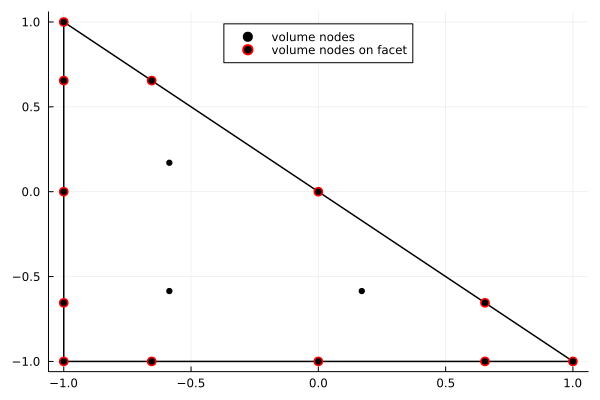

In [38]:
xy = SymCubatures.calcnodes(oper_tri.cub, oper_tri.vtx);
plot_tri_nodes(x=xy)

## 3D Operators


3D operators of the following range of degrees are currently available. 

SBP diagonal-$\sf E$: $p=\{1,\dots,5\}$ 

SBP-$\sf \Omega$ and SBP-$\sf \Gamma$: $p=\{1,\dots,4\}$

In [40]:
p = 3;
q = 2*p-1; # For SBP-Omega and SBP-Gamma, q=2p by default.
faceoper =:DiagE; #Facet operator type for SBP diagonal-E. It can either be SBP diagonal-E or SBP-Omega type (on the facet triangles).

In [41]:
oper_tet = SummationByParts.getTetSBPDiagE(degree=p, faceopertype=faceoper, cubdegree=q)
# oper_tet = SummationByParts.getTetSBPOmega(degree=p)
# oper_tet = SummationByParts.getTetSBPGamma(degree=p)

TetSBP{Float64}(3, 44, TetSymCub{Float64}(4, 5, 44, true, false, false, false, 1, 2, 0, 1, 0, 0, 0, [0, 2, 0, 3, 0], [0.5008941915142769, 0.8506802519794945, 0.23722737279318576, 0.3077459416259917], [0.0015673886232196292, 0.17081759879508043, 0.033441261076507856, 0.01477813407660693, 0.00543005348522964]), [-1.0 -1.0 -1.0; 1.0 -1.0 -1.0; -1.0 1.0 -1.0; -1.0 -1.0 1.0], [0.0015673886232196292, 0.0015673886232196292, 0.0015673886232196292, 0.0015673886232196292, 0.17081759879508043, 0.17081759879508043, 0.17081759879508043, 0.17081759879508043, 0.033441261076507856, 0.033441261076507856  …  0.00543005348522964, 0.00543005348522964, 0.00543005348522964, 0.00543005348522964, 0.00543005348522964, 0.00543005348522964, 0.00543005348522964, 0.00543005348522964, 0.00543005348522964, 0.00543005348522964], [-0.007130359307204485 -0.0001390206330062802 … -0.0005333368972286767 -0.0005333368972286266; 0.0001390206330062802 0.007130359307204485 … 0.0005333368972286539 0.0005333368972286139; … ; 0.

In [42]:
Qx = oper_tet.Q[:,:,1];
Qy = oper_tet.Q[:,:,2];
Qz = oper_tet.Q[:,:,3];
H = diagm(oper_tet.w);
Ex = oper_tet.E[:,:,1];
Ey = oper_tet.E[:,:,2];
Ez = oper_tet.E[:,:,3];
Dx = inv(H)*Qx;
Dy = inv(H)*Qy;
Dz = inv(H)*Qz;
Sx = Qx - 0.5.*Ex;
Sy = Qy - 0.5.*Ey;
Sz = Qz - 0.5.*Ez;

Test if the SBP property is satisfied. 

In [43]:
norm(Qx+Qx' - Ex)

0.0

In [44]:
norm(Qy+Qy' - Ey)

0.0

In [45]:
norm(Qz+Qz' - Ez)

0.0

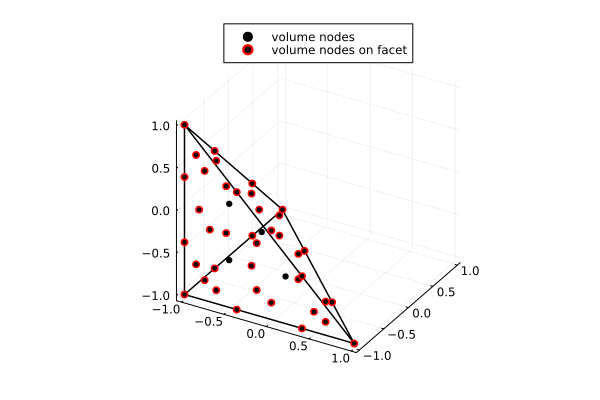

In [46]:
xyz = SymCubatures.calcnodes(oper_tet.cub, oper_tet.vtx);
plot_tet_nodes(x=xyz)

The facet quadrature rules (on the reference triangle) can then be obtained as

In [47]:
qf = 2*p # the facet quadrature must be degree 2p accuracte
cub_tet_facet, vtx_tet_facet = SummationByParts.getTriCubatureForTetFaceDiagE(qf, faceopertype=faceoper)
# cub_tet_facet, vtx_tet_facet = SummationByParts.getTriCubatureOmega(qf) # for SBP-Omega and SBP-Gamma operators

(TriSymCub{Float64}(3, 4, 15, true, false, false, 1, 2, 0, [0, 3, 1], [0.8506802519794945, 0.23722737279318576, 0.3077459416259917], [0.01426071861440897, 0.3303589772911334, 0.20376930605390392, 0.059138832353610636]), [-1.0 -1.0; 1.0 -1.0; -1.0 1.0])

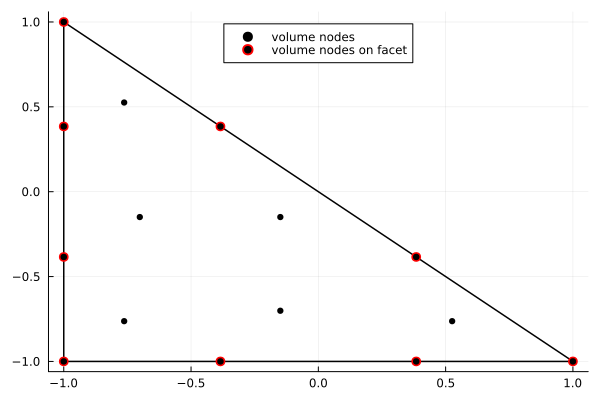

In [48]:
xy_facet = SymCubatures.calcnodes(cub_tet_facet, vtx_tet_facet);
plot_tri_nodes(x=xy_facet)